<a href="https://colab.research.google.com/github/ana-pinzon/Detectron2_test/blob/main/Training_of_instance_segmentation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Microcontroller Instance Segmentation with COCO dataformat
<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/Detectron2-Train-a-Instance-Segmentation-Model/blob/master/Microcontroller_Instance_Segmentation_with_COCO_dataformat.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/Detectron2-Train-a-Instance-Segmentation-Model/blob/master/Microcontroller_Instance_Segmentation_with_COCO_dataformat.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

## Install detectron2

> **Install all dependencies**


In [ ]:
!pip freeze

In [ ]:
# install dependencies: 
!pip install pyyaml==5.1
#pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

     |████████████████████████████████| 274 kB 5.3 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=88dffac11365925cc6ba6cf8317b775a4fbe3c37321ff3ffb2a2ef357cfd88c9
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 763.5 MB 15 kB/s 
     |████████████████████████████████| 17.3 MB 293 kB/s 
     |████████████████████████████████| 1.9 MB 5.4 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102


In [ ]:
from collections import OrderedDict
# install detectron2: (Colab has CUDA 10.1 + torch 1.8)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.8")   # need to manually install torch 1.8 if Colab changes its default version
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime
!pip install wandb -q

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
     |████████████████████████████████| 6.3 MB 7.2 MB/s 
     |████████████████████████████████| 49 kB 3.8 MB/s 
     |████████████████████████████████| 74 kB 3.8 MB/s 
     |████████████████████████████████| 144 kB 46.5 MB/s 
     |████████████████████████████████| 130 kB 71.3 MB/s 
     |████████████████████████████████| 743 kB 50.4 MB/s 
     |████████████████████████████████| 722 kB 44.6 MB/s 
     |████████████████████████████████| 112 kB 73.8 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20210804-py3-none-any.whl size=60618 sha256=0c049e0bc7cea2387dcf22c7737a895c691fb0be1a14736df3dffd1fde0b7b68
  Stored in directory: /root/.cache/pip/wheels/1d/e2/fe/67887e71552be741faccead8f7a8e013b6e0b1225cf591afa1
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141229 sha256=b2b5195f5f13cbf0a4511ba7fdeb92829a6a2fbdb60e3fc473d84c99bfd439

     |████████████████████████████████| 1.8 MB 8.3 MB/s 
     |████████████████████████████████| 170 kB 67.4 MB/s 
     |████████████████████████████████| 133 kB 58.7 MB/s 
     |████████████████████████████████| 138 kB 73.4 MB/s 
     |████████████████████████████████| 97 kB 7.8 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 62 kB 997 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.8.0+cu101 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
#import some nice libraries and tools needed from detectron2
import logging
import os
import argparse
from collections import OrderedDict
import pandas as pd
import numpy as np
import torch
from torch.nn.parallel import DistributedDataParallel

import detectron2.utils.comm as comm
from detectron2.checkpoint import DetectionCheckpointer, PeriodicCheckpointer
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.data import (
    MetadataCatalog,
    build_detection_test_loader,
    build_detection_train_loader,
)
from detectron2.engine import default_argument_parser, default_setup, launch
from detectron2.evaluation import ( ### Changes from original, I don't need all the different evaluators
    COCOEvaluator,
    DatasetEvaluators,
    inference_on_dataset,
    print_csv_format
)
from detectron2.modeling import build_model
from detectron2.solver import build_lr_scheduler, build_optimizer
# Not sure what these do but they may help to track experiments
from detectron2.utils.events import (
    CommonMetricPrinter,
    EventStorage,
    JSONWriter,
    TensorboardXWriter
)

from detectron2.utils.visualizer import Visualizer

# Setup logger
logger = logging.getLogger("detectron2")

In [ ]:
import cv2
import json
import random
import os
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow
from tqdm import tqdm

# wandb - Import weight's & biases
import wandb

import torch, torchvision
print(torch.__version__)
!gcc --version

1.8.0+cu101
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
!nvidia-smi

Thu Aug  5 08:19:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#wandb(weights and biases) is a great tool for logging the training progress and comparing results
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import wandb
wandb.init(project="Acheta_recognition_software", 
           sync_tensorboard=True)

## Get data

In [ ]:
#kaggle is an online data storage tool in which the training and testing data was uploaded 
!pip install -q kaggle
!pip install -q kaggle-cli

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "jakobguebel" 
os.environ['KAGGLE_KEY'] = "1bb3ed30574335e953b603dcf1dd5e2d"
!kaggle datasets download -d jakobguebel/dataset-july21

In [ ]:
#list all available directories to know where training and testing data lies
!unzip dataset-july21.zip
!ls

## Register data-set

In order to use a dataset with Detectron2 we need to register it. For more information check out the official documentation.

In [ ]:
/content/output/output/coco_instances.json

In [ ]:
#call the dataset and register training as well as testing data
from detectron2.data.datasets import register_coco_instances

for d in ["train"]:
    register_coco_instances(f"dataset-july21_v2mf-a_{d}", {}, f"/content/drive/MyDrive/MachineLearning-Projekt/dataset-july21/datageneration_v2mf_output/coco_instances.json", f"/content/drive/MyDrive/MachineLearning-Projekt/dataset-july21/datageneration_v2mf_output/images")

for d in ["test"]:
    register_coco_instances(f"dataset-july21_v2mf-a_{d}", {}, f"/content/drive/MyDrive/MachineLearning-Projekt/dataset-july21/datageneration_v2mf_output_test/coco_instances.json", f"/content/drive/MyDrive/MachineLearning-Projekt/dataset-july21/datageneration_v2mf_output_test/images")

**
Check, if data has been registered correctly**


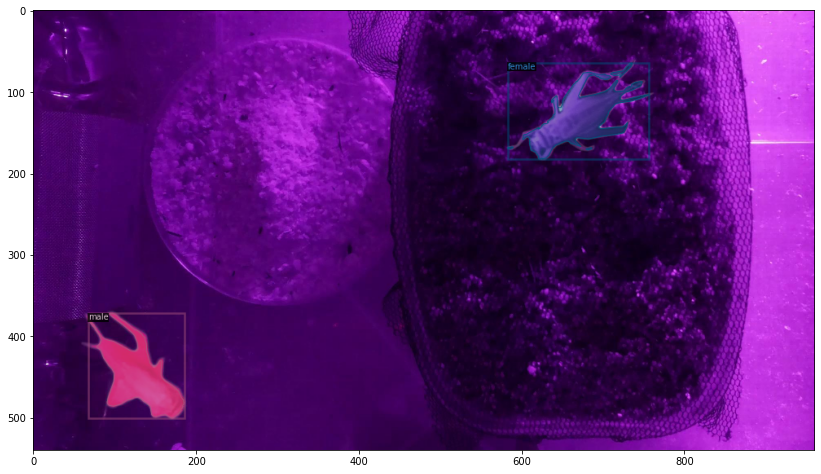

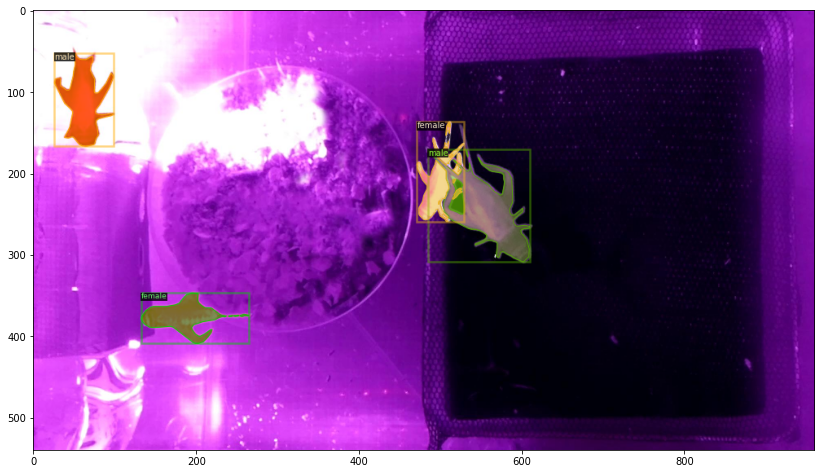

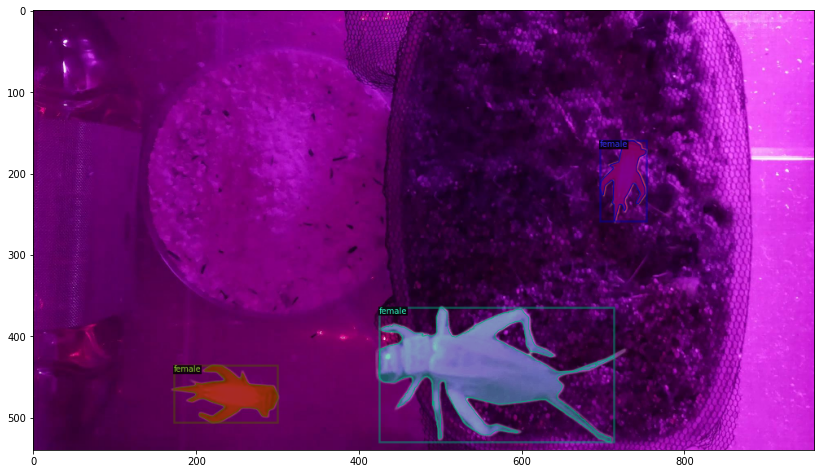

In [ ]:
import random
import matplotlib.pyplot as plt
from detectron2.data import DatasetCatalog, MetadataCatalog

dataset_dicts = DatasetCatalog.get("dataset-july21_v2mf-a_train")
acheta_metadata = MetadataCatalog.get("dataset-july21_v2mf-a_train")

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1], metadata=acheta_metadata, scale=0.5)
    v = v.draw_dataset_dict(d)
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

## Train model

Now, let's fine-tune a pretrained FasterRCNN instance segmentation model on our dataset


### First-time training

In [ ]:
# Different models I'd like to try - https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md
models_to_try = {
    "R50-FPN-1x": "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml"
    # R50-FPN-1x was choosen as final architecture because of a good tradeoff between accuracy and speed 
    #"R50-FPN-3x": "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml",
    #"R101-FPN-3x": "COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"
}

In [ ]:
# Create evealuater for coco
def get_evaluator(cfg, dataset_name, output_folder=None):
  """
  Create a COCOEvaluator
  """
  if output_folder is None:
    output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
  evaluator = COCOEvaluator(
      dataset_name=dataset_name,
      distributed=False,
      output_dir=output_folder
  )
  return evaluator

In [ ]:
# Create testing function
def do_test(cfg, model):
  results = OrderedDict()
  for dataset_name in cfg.DATASETS.TEST:
    data_loader = build_detection_test_loader(cfg, dataset_name)
    # Create the evaluator
    evaluator = get_evaluator(
        cfg, 
        dataset_name,
        output_folder=os.path.join(cfg.OUTPUT_DIR, "inference", dataset_name)
    )
    # Make inference on dataset
    results_i = inference_on_dataset(model,
                                     data_loader,
                                     evaluator)
    # Update results dictionary
    results[dataset_name] = results_i

    print("### Returning results_i...")
    #print(results_i)
    #print(f"### Average Precision: {results_i['AP']}")
    # Let's get some communication happening
    if comm.is_main_process():
      logger.info("Evaluation results for {} in csv format:".format(dataset_name))
      ## wandb.log()? TODO/NOTE: This may be something Weights & Biases can track
      #print("### Calculating results...")
      print_csv_format(results_i)
    
    # Check to see length of results
    if len(results) == 1:
      results = list(results.values())[0]
    #print("### Returning results...")
    #print(results)

    # TODO : log results_i dict with different parameters
    print("### Saving results to Weights & Biases...")
    wandb.log(results_i)

    return results

In [ ]:
def do_train(cfg, model, resume=False):
  # Set model to training mode
  model.train()
  # Create optimizer from config file (returns torch.nn.optimizer.Optimizer)
  optimizer = build_optimizer(cfg, model)
  # Create scheduler for learning rate (returns torch.optim.lr._LR_scheduler)
  scheduler = build_lr_scheduler(cfg, optimizer)
  print(f"Scheduler: {scheduler}")

  # Create checkpointer
  checkpointer = DetectionCheckpointer(
      model, save_dir=cfg.OUTPUT_DIR, optimizer=optimizer, scheduler=scheduler
  )

  # Create start iteration (refernces checkpointer) - https://detectron2.readthedocs.io/modules/checkpoint.html#detectron2.checkpoint.Checkpointer.resume_or_load
  start_iter = (
      # This can be 0
      checkpointer.resume_or_load(cfg.MODEL.WEIGHTS, # Use predefined model weights (pretrained model)
                                  resume=resume).get("iteration", -1) + 1
  )
  # Set max number of iterations
  max_iter = cfg.SOLVER.MAX_ITER

  # Create periodiccheckpoint
  periodic_checkpointer = PeriodicCheckpointer(checkpointer=checkpointer,
                                               # How often to make checkpoints?
                                               period=cfg.SOLVER.CHECKPOINT_PERIOD,
                                               max_iter=max_iter)
  
  # Create writers (for saving checkpoints?)
  writers = (
      [
       # Print out common metrics such as iteration time, ETA, memory, all losses, learning rate
       CommonMetricPrinter(max_iter=max_iter),
       # Write scalars to a JSON file such as loss values, time and more
       JSONWriter(os.path.join(cfg.OUTPUT_DIR, "metrics.json")),
       # Write all scalars such as loss values to a TensorBoard file for easy visualization
       TensorboardXWriter(cfg.OUTPUT_DIR),
      ]
      if comm.is_main_process()
      else []
  )

  ### Original note from script: ###
  # compared to "train_net.py", we do not support accurate timing and precise BN
  # here, because they are not trivial to implement

  # Build a training data loader based off the training dataset name in the config
  data_loader = build_detection_train_loader(cfg)

  # Start logging
  logger.info("Starting training from iteration {}".format(start_iter))

  # Store events
  with EventStorage(start_iter) as storage:
    # Loop through zipped data loader and iteration
    for data, iteration in zip(data_loader, range(start_iter, max_iter)):
      iteration = iteration + 1
      storage.step() # update stroage with step - https://detectron2.readthedocs.io/modules/utils.html#detectron2.utils.events.EventStorage.step

      # Create loss dictionary by trying to model data
      loss_dict = model(data)
      losses = sum(loss_dict.values())
      # Are losses infinite? If so, something is wrong
      assert torch.isfinite(losses).all(), loss_dict

      # TODO - Not quite sure what's happening here
      loss_dict_reduced = {k: v.item() for k, v in comm.reduce_dict(loss_dict).items()}
      # Sum up losses
      losses_reduced = sum(loss for loss in loss_dict_reduced.values())
      
      # # TODO: wandb.log()? log the losses
      # wandb.log({
      #     "Total loss": losses_reduced
      # })

      # Update storage
      if comm.is_main_process():
        # Store informate in storage - https://detectron2.readthedocs.io/modules/utils.html#detectron2.utils.events.EventStorage.put_scalars
        storage.put_scalars(total_loss=losses_reduced,
                            **loss_dict_reduced)
      
      # Start doing PyTorch things
      optimizer.zero_grad()
      losses.backward()
      optimizer.step()
      # Add learning rate to storage information
      storage.put_scalar("lr", optimizer.param_groups[0]["lr"], smoothing_hint=False)
      # This is required for your learning rate to change!!!! (not having this meant my learning rate was staying at 0)
      scheduler.step()

      # Perform evaluation?
      if (
          cfg.TEST.EVAL_PERIOD > 0
          and iteration % cfg.TEST.EVAL_PERIOD == 0
          and iteration != max_iter
      ):
          do_test(cfg, model)
          # TODO - compared to "train_net.py", the test results are not dumped to EventStorage
          comm.synchronize()
      
      # Log different metrics with writers
      if iteration - start_iter > 5 and (iteration % 20 == 0 or iteration == max_iter):
        for writer in writers:
          writer.write()
      
      # Update the periodic_checkpointer
      periodic_checkpointer.step(iteration)

In [ ]:
 #Create setup function
def setup(args):
  """
  Create configs and perform basic setups.
  """
  cfg = get_cfg()
  cfg.merge_from_file(args.config_file) # This will take some kind of model.yaml file
  cfg.merge_from_list(args.opts)
  cfg.freeze()
  default_setup(
      cfg, args
  ) # this logs the config and arguments passed to the command line to the output file

  # Load config YAML as dict
  cfg_yaml = cfg.load_yaml_with_base(os.path.join(cfg.OUTPUT_DIR, "config.yaml"))

  # default_config = get_cfg()
  # default_config_loaded = default_config.load_yaml_with_base("output/config.yaml")
  # default_config_loaded

  # TODO: turn config into YAML and save to weights & biases
  # TODO: Init wandb and add configs
  # Setup a new weights & biases run every time we run the setup() function
  wandb.init(project="Acheta_recognition_software", 
             sync_tensorboard=True)
  
  #print("### Printing config_yaml file to go into Weights & Biases")
  #print(cfg_yaml)
  wandb.config.update(cfg_yaml)

  return cfg

In [ ]:
# Create main function
def main(args):
  
  # Create the config file
  cfg = setup(args)

  # Build the model
  model = build_model(cfg)
  
  # Log what's going on
  logger.info("Model:\n{}".format(model))

  # TODO: Fix this (if it doesn't work)
  #wandb.watch(model, log="all")

  # Only do evaluation if the args say so
  if args.eval_only:
    DetectionCheckpointer(model, save_dir=cfg.OUTPUT_DIR).resume_or_load(
        cfg.MODEL.WEIGHTS, resume=args.resume
    )
    return do_test(cfg, model)

  # Do distributed training? (depends on number of GPUs available)
  distributed = comm.get_world_size() > 1
  if distributed:
    # Put the model on multiple devices if available
    model = DistributedDataParallel(
        model, 
        device_ids=[comm.get_local_rank()], 
        broadcast_buffers=False
    )

  # Train the model
  do_train(cfg, model)
  # TODO - May want to evaluate in a different step?
  return do_test(cfg, model)

In [ ]:
# Setup arg parser
parser = default_argument_parser() # default in Detectron2

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Setup different weights and config files to try
weights = []
configs = []
for k, v in models_to_try.items():
  model = models_to_try[k]
  model_weights = model_zoo.get_checkpoint_url(model)
  weights.append(model_weights)
  config_file = model_zoo.get_config_file(model)
  configs.append(config_file)


In [ ]:
# DO NOT RUN FOR FIRST-TIME TRAINING (?)

weights = []
configs = []

model_weights = "/content/drive/MyDrive/Trained_model/model_final.pth"
weights.append(model_weights)
config_file = "/content/drive/MyDrive/Trained_model/config.yml"
configs.append(config_file)

In [ ]:
weights_configs = dict(zip(weights, configs))
weights_configs

{'https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x/137260431/model_final_a54504.pkl': '/usr/local/lib/python3.7/dist-packages/detectron2/model_zoo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml'}

In [ ]:
torch.cuda.device_count()

1

In [ ]:
 
# Setup different arg strings to pass to main() 
# To improve model accuracy, hyperparameters could be slightly modified 
workers = 2
# For transfer learning, divide LR by 10
ims_per_batch = 2
lr = 0.001 # divide LR by 8 according to linear scheduling rate: https://github.com/facebookresearch/detectron2/blob/master/configs/Base-RetinaNet.yaml
max_iter = 20000 # for a full model this should be in accordance with the linear scaling (e.g. increased by 8x from default)
seed = -1
num_classes = 1
warmup_iters = 1000 # how many iterations does it take to warmup to the learning rate
eval_period = 0 # how often to evaluate the data (number of steps, usual is to do at the end of all training)
steps = (15000,) # when the learning rate should be decreased
num_gpus = torch.cuda.device_count()
#eval_only = True
output_dir = "output" 
# where do you want the outputs to be saved?
arg_strings = []
for weights, config in weights_configs.items():
  arg_strings = []
for weights, config in weights_configs.items():
  arg_string = f"--config-file {config} \
                MODEL.WEIGHTS {weights} \
                DATASETS.TRAIN ('dataset-july21_v1j-b_train',) \
                DATASETS.TEST ('dataset-july21_v1j-b_test',) \
                DATALOADER.NUM_WORKERS {workers} \
                SOLVER.IMS_PER_BATCH {ims_per_batch} \
                SOLVER.BASE_LR {lr} \
                SOLVER.MAX_ITER {max_iter} \
                SEED {seed} \
                MODEL.ROI_HEADS.NUM_CLASSES {num_classes}".split()
  arg_strings.append(arg_string)

In [ ]:
# Create different arg parsers
arg_list = []
for arg_string in arg_strings:
  args = parser.parse_args(arg_string)
  print(args)
  arg_list.append(args)

Namespace(config_file='/usr/local/lib/python3.7/dist-packages/detectron2/model_zoo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=False, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', 'https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x/137260431/model_final_a54504.pkl', 'DATASETS.TRAIN', "('dataset-july21_v1j-b_train',)", 'DATASETS.TEST', "('dataset-july21_v1j-b_test',)", 'DATALOADER.NUM_WORKERS', '2', 'SOLVER.IMS_PER_BATCH', '2', 'SOLVER.BASE_LR', '0.001', 'SOLVER.MAX_ITER', '20000', 'SEED', '-1', 'MODEL.ROI_HEADS.NUM_CLASSES', '1'], resume=False)


In [ ]:
for i, namespace in enumerate(arg_list):
  print(f"Running experiment: {i}")
  main(namespace)

Running experiment: 0
[07/30 15:34:59 detectron2]: Rank of current process: 0. World size: 1
[07/30 15:35:00 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.11 (default, Jul  3 2021, 18:01:19) [GCC 7.5.0]
numpy                   1.19.5
detectron2              0.5 @/usr/local/lib/python3.7/dist-packages/detectron2
Compiler                GCC 7.3
CUDA compiler           CUDA 10.1
detectron2 arch flags   3.7, 5.0, 5.2, 6.0, 6.1, 7.0, 7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.8.0+cu101 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           Yes
GPU 0                   Tesla P100-PCIE-16GB (arch=6.0)
CUDA_HOME               /usr/local/cuda
Pillow                  7.1.2
torchvision             0.9.0+cu101 @/usr/local/lib/python3.7/dist-packages/torchvision
torchvision arch flags  3.5, 5.0, 6.0, 7.0, 

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: W&B syncing is set to `offline` in this directory.  Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


[07/30 15:36:04 detectron2]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): Sequ

model_final_a54504.pkl: 178MB [00:09, 19.3MB/s]                           


[07/30 15:36:14 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
WARNING [07/30 15:36:14 fvcore.common.checkpoint]: Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
WARNING [07/30 15:36:14 fvcore.common.checkpoint]: Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
WARNING [07/30 15:36:14 fvcore.common.checkpoint]: Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
WARNING [07/30 15:36:14 fvcore.common.checkpoint]: Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the mo

### Improve previous model

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file('/content/drive/MyDrive/MachineLearning-Projekt/dataset-july21/trained_model_v1j/config.yaml')
cfg.DATASETS.TRAIN = ("dataset-july21_v2mf-a_train",)
cfg.DATASETS.TEST = ("dataset-july21_v2mf-a_test",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/MachineLearning-Projekt/dataset-july21/trained_model_v1j/model_final.pth"
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 15000
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3
cfg.OUTPUT_DIR = "./train_exist_new"

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=True)
trainer.train()

[08/04 09:11:43 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (2, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (2,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (4, 1024) in the checkpoint but (12, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (4,) in the checkpoint but (12,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (1, 256, 1, 1) in the checkpoint but (3, 256, 1, 1) in the 

[08/04 09:12:03 d2.engine.train_loop]: Starting training from iteration 0
[08/04 09:12:13 d2.utils.events]:  eta: 1:48:44  iter: 19  total_loss: 2.664  loss_cls: 1.362  loss_box_reg: 0.479  loss_mask: 0.6907  loss_rpn_cls: 0.07509  loss_rpn_loc: 0.01805  time: 0.4402  data_time: 0.0707  lr: 4.9953e-06  max_mem: 2848M
[08/04 09:12:23 d2.utils.events]:  eta: 1:51:49  iter: 39  total_loss: 2.359  loss_cls: 1.195  loss_box_reg: 0.4575  loss_mask: 0.6859  loss_rpn_cls: 0.04513  loss_rpn_loc: 0.01161  time: 0.4569  data_time: 0.0802  lr: 9.9902e-06  max_mem: 2954M
[08/04 09:12:32 d2.utils.events]:  eta: 1:53:49  iter: 59  total_loss: 2.143  loss_cls: 0.9315  loss_box_reg: 0.5341  loss_mask: 0.6747  loss_rpn_cls: 0.02243  loss_rpn_loc: 0.01201  time: 0.4609  data_time: 0.0428  lr: 1.4985e-05  max_mem: 2954M
[08/04 09:12:41 d2.utils.events]:  eta: 1:53:40  iter: 79  total_loss: 1.739  loss_cls: 0.6134  loss_box_reg: 0.3796  loss_mask: 0.6583  loss_rpn_cls: 0.01976  loss_rpn_loc: 0.008876  time

In [ ]:
!zip -r /content/train_exist.zip /content/train_exist/


  adding: content/train_exist/ (stored 0%)
  adding: content/train_exist/model_final.pth (deflated 7%)
  adding: content/train_exist/events.out.tfevents.1624520435.ddc2efe421df.60.0 (deflated 71%)
  adding: content/train_exist/metrics.json (deflated 76%)
  adding: content/train_exist/last_checkpoint (stored 0%)


## Use model for inference

Now, we can perform inference on our validation set by creating a predictor object.

In [ ]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab
import pandas 
print(pandas.__version__)

1.8.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

1.1.5


In [ ]:
from collections import OrderedDict
# install detectron2: (Colab has CUDA 10.1 + torch 1.8)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.8")   # need to manually install torch 1.8 if Colab changes its default version
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime
#!pip install wandb -q

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html


In [ ]:

import detectron2.utils.comm as comm
from detectron2.checkpoint import DetectionCheckpointer, PeriodicCheckpointer
from detectron2 import model_zoo # a series of pre-trained Detectron2 models: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md
from detectron2.config import get_cfg
from detectron2.data import (
    MetadataCatalog,
    build_detection_test_loader,
    build_detection_train_loader,
    DatasetCatalog
)
from detectron2.engine import default_argument_parser, default_setup, launch
from detectron2.evaluation import ( ### Changes from original, I don't need all the different evaluators
    COCOEvaluator,
    DatasetEvaluators,
    inference_on_dataset,
    print_csv_format
)
from detectron2.modeling import build_model
from detectron2.solver import build_lr_scheduler, build_optimizer
# Not sure what these do but they may help to track experiments
from detectron2.utils.events import (
    CommonMetricPrinter,
    EventStorage,
    JSONWriter,
    TensorboardXWriter
)
# Some basic setup:
# Setup detectron2 logger
from detectron2.utils.logger import setup_logger
setup_logger() # this logs Detectron2 information such as what the model is doing when it's training

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor # a default predictor class to make predictions on an image using a trained model
from detectron2.utils.visualizer import Visualizer # a class to help visualize Detectron2 predictions on an image
 # stores information about the model such as what the training/test data is, what the class names are


In [ ]:
import json
import os
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow
import random
import matplotlib.pyplot as plt

import argparse
from collections import OrderedDict
from torch.nn.parallel import DistributedDataParallel
#import torch, torchvision
from tqdm import tqdm
import cv2
from google.colab.patches import cv2_imshow

**Configure model to run inference**

In [ ]:
target_classes = ['juvenile']
#Order of target classes must be the same as in trained model (as in config of model before training)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setup a model config file (set of instructions for the model)
cfg = get_cfg() # setup a default config, see: https://detectron2.readthedocs.io/modules/config.html
cfg.merge_from_file("/content/drive/MyDrive/MachineLearning-Projekt/dataset-july21/trained_model_v1j/config.yaml") # merge the config YAML file (a set of instructions on how to build a model)
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/MachineLearning-Projekt/dataset-july21/trained_model_v1j/model_final.pth" # setup the model weights from the fully trained model

# original:
#cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/iter2/trained_model/trained_model.pth"
#cfg.MODEL.WEIGHTS = "/content/train_exist/model_final.pth" # setup the model weights from the fully trained model


In [ ]:
#cfg.MODEL.WEIGHTS = "/content/train_exist/model_final.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1
predictor = DefaultPredictor(cfg)
print(cfg)

CUDNN_BENCHMARK: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  FILTER_EMPTY_ANNOTATIONS: True
  NUM_WORKERS: 2
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: ()
  PROPOSAL_FILES_TRAIN: ()
  TEST: ('dataset-july21_v1j-b_test',)
  TRAIN: ('dataset-july21_v1j-b_train',)
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: False
    SIZE: [0.9, 0.9]
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN: (640, 672, 704, 736, 768, 800)
  MIN_SIZE_TRAIN_SAMPLING: choice
  RANDOM_FLIP: horizontal
MODEL:
  ANCHOR_GENERATOR:
    ANGLES: [[-90, 0, 90]]
    ASPECT_RATIOS: [[0.5, 1.0, 2.0]]
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES: [[32], [64], [128], [256], [512]]
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_resnet_fpn_backbone
  DEVICE: cuda
  FPN:
    FUSE_TYPE: sum
   

In [ ]:
#Generic Mask is needed to easily get labels
class GenericMask:
    """
    Attribute:
        polygons (list[ndarray]): list[ndarray]: polygons for this mask.
            Each ndarray has format [x, y, x, y, ...]
        mask (ndarray): a binary mask
    """

    def __init__(self, mask_or_polygons, height, width):
        self._mask = self._polygons = self._has_holes = None
        self.height = height
        self.width = width

        m = mask_or_polygons
        if isinstance(m, dict):
            # RLEs
            assert "counts" in m and "size" in m
            if isinstance(m["counts"], list):  # uncompressed RLEs
                h, w = m["size"]
                assert h == height and w == width
                m = mask_util.frPyObjects(m, h, w)
            self._mask = mask_util.decode(m)[:, :]
            return

        if isinstance(m, list):  # list[ndarray]
            self._polygons = [np.asarray(x).reshape(-1) for x in m]
            return

        if isinstance(m, np.ndarray):  # assumed to be a binary mask
            assert m.shape[1] != 2, m.shape
            assert m.shape == (height, width), m.shape
            self._mask = m.astype("uint8")
            return

        raise ValueError("GenericMask cannot handle object {} of type '{}'".format(m, type(m)))

    @property
    def mask(self):
        if self._mask is None:
            self._mask = self.polygons_to_mask(self._polygons)
        return self._mask

    @property
    def polygons(self):
        if self._polygons is None:
            self._polygons, self._has_holes = self.mask_to_polygons(self._mask)
        return self._polygons

    @property
    def has_holes(self):
        if self._has_holes is None:
            if self._mask is not None:
                self._polygons, self._has_holes = self.mask_to_polygons(self._mask)
            else:
                self._has_holes = False  # if original format is polygon, does not have holes
        return self._has_holes

    def mask_to_polygons(self, mask):
        # cv2.RETR_CCOMP flag retrieves all the contours and arranges them to a 2-level
        # hierarchy. External contours (boundary) of the object are placed in hierarchy-1.
        # Internal contours (holes) are placed in hierarchy-2.
        # cv2.CHAIN_APPROX_NONE flag gets vertices of polygons from contours.
        mask = np.ascontiguousarray(mask)  # some versions of cv2 does not support incontiguous arr
        res = cv2.findContours(mask.astype("uint8"), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
        hierarchy = res[-1]
        if hierarchy is None:  # empty mask
            return [], False
        has_holes = (hierarchy.reshape(-1, 4)[:, 3] >= 0).sum() > 0
        res = res[-2]
        res = [x.flatten() for x in res]
        # These coordinates from OpenCV are integers in range [0, W-1 or H-1].
        # We add 0.5 to turn them into real-value coordinate space. A better solution
        # would be to first +0.5 and then dilate the returned polygon by 0.5.
        res = [x + 0.5 for x in res if len(x) >= 6]
        return res, has_holes

    def polygons_to_mask(self, polygons):
        rle = mask_util.frPyObjects(polygons, self.height, self.width)
        rle = mask_util.merge(rle)
        return mask_util.decode(rle)[:, :]

    def area(self):
        return self.mask.sum()

    def bbox(self):
        p = mask_util.frPyObjects(self.polygons, self.height, self.width)
        p = mask_util.merge(p)
        bbox = mask_util.toBbox(p)
        bbox[2] += bbox[0]
        bbox[3] += bbox[1]
        return bbox

In [ ]:
#create text labels with network probability of correct prediciton
def _create_text_labels(classes, scores, class_names, is_crowd=None):
    """
    Args:
        classes (list[int] or None):
        scores (list[float] or None):
        class_names (list[str] or None):
        is_crowd (list[bool] or None):

    Returns:
        list[str] or None
    """
    labels = None
    if classes is not None:
        if class_names is not None and len(class_names) > 0:
            labels = [class_names[i] for i in classes]
        else:
            labels = [str(i) for i in classes]
    if scores is not None:
        if labels is None:
            labels = ["{:.0f}%".format(s * 100) for s in scores]
        else:
            labels = ["{} {:.0f}%".format(l, s * 100) for l, s in zip(labels, scores)]
    if labels is not None and is_crowd is not None:
        labels = [l + ("|crowd" if crowd else "") for l, crowd in zip(labels, is_crowd)]
    return labels

In [ ]:
#get all data in textform
def textinference(image):
  outputs = predictor(image)
  predictions =outputs['instances'].to('cpu')
  boxes = predictions.pred_boxes if predictions.has("pred_boxes") else None
  scores = predictions.scores if predictions.has("scores") else None
  classes = predictions.pred_classes.tolist() if predictions.has("pred_classes") else None
  labels = _create_text_labels(classes, scores, v.metadata.get("thing_classes", None))
  keypoints = predictions.pred_keypoints if predictions.has("pred_keypoints") else None

  if predictions.has("pred_masks"):
      masks = np.asarray(predictions.pred_masks)
      masks = [GenericMask(x, v.output.height, v.output.width) for x in masks]
  else:
      masks = None
  return boxes, scores, classes, labels, keypoints

**Run inference on video**


In [ ]:
#!/usr/bin/env python3
# -- coding: utf-8 --

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
# import some common libraries
import numpy as np
import tqdm
import cv2
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.video_visualizer import VideoVisualizer
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.data import MetadataCatalog
import time

# Extract video properties
video = cv2.VideoCapture('/content/drive/MyDrive/MachineLearning-Projekt/VideoData_Detection/count_test.mp4')
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
frames_per_second = video.get(cv2.CAP_PROP_FPS)
num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
target_classes = ['juvenile']
# Initialize video writer
print(frames_per_second)
video_writer = cv2.VideoWriter('count_test_v1j_inference.mp4', fourcc=cv2.VideoWriter_fourcc(*"mp4v"), fps=float(frames_per_second), frameSize=(width, height), isColor=True)
# Initialize visualizer
#v = VideoVisualizer(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), ColorMode.IMAGE)
v = VideoVisualizer(metadata=MetadataCatalog.get(cfg.DATASETS.TEST[0]).set(thing_classes=target_classes), 
                      instance_mode=ColorMode.IMAGE_BW)

def runOnVideo(video, maxFrames):
    """ Runs the predictor on every frame in the video (unless maxFrames is given),
    and returns the frame with the predictions drawn.
    """

    readFrames = 0
    while True:
        print("runn")
        hasFrame, frame = video.read()
        if not hasFrame:
          print("Quit!")
          break

        # Get prediction results for this frame
        outputs = predictor(frame)

        # Make sure the frame is colored
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        # Draw a visualization of the predictions using the video visualizer
        visualization = v.draw_instance_predictions(frame, outputs["instances"].to("cpu"))

        # Convert Matplotlib RGB format to OpenCV BGR format
        visualization = cv2.cvtColor(visualization.get_image(), cv2.COLOR_RGB2BGR)

        yield visualization

        readFrames += 1
        if readFrames > maxFrames:
            break

# Create a cut-off for debugging
num_frames = 100

# Enumerate the frames of the video
for visualization in tqdm.tqdm(runOnVideo(video, num_frames), total=num_frames):
    print("iter" + str(1))
    # Write test image
    cv2.imwrite('POSE detectron2.png', visualization)

    # Write to video file
    video_writer.write(visualization)

# Release resources
video.release()
video_writer.release()
cv2.destroyAllWindows()

  0%|          | 0/100 [00:00<?, ?it/s]

3.0
runn
iter1


  1%|          | 1/100 [00:02<04:25,  2.68s/it]

runn
iter1


  2%|▏         | 2/100 [00:05<04:16,  2.62s/it]

runn
iter1


  3%|▎         | 3/100 [00:07<04:05,  2.53s/it]

runn
iter1


  4%|▍         | 4/100 [00:09<03:56,  2.47s/it]

runn
iter1


  5%|▌         | 5/100 [00:12<03:51,  2.43s/it]

runn
iter1


  6%|▌         | 6/100 [00:14<03:50,  2.45s/it]

runn
iter1


  7%|▋         | 7/100 [00:17<03:46,  2.44s/it]

runn
iter1


  8%|▊         | 8/100 [00:19<03:45,  2.45s/it]

runn
iter1


  9%|▉         | 9/100 [00:21<03:42,  2.44s/it]

runn
iter1


 10%|█         | 10/100 [00:24<03:40,  2.45s/it]

runn
iter1


 11%|█         | 11/100 [00:26<03:37,  2.45s/it]

runn
iter1


 12%|█▏        | 12/100 [00:29<03:36,  2.46s/it]

runn
iter1


 13%|█▎        | 13/100 [00:31<03:35,  2.47s/it]

runn
iter1


 14%|█▍        | 14/100 [00:34<03:33,  2.48s/it]

runn
iter1


 15%|█▌        | 15/100 [00:36<03:29,  2.46s/it]

runn
iter1


 16%|█▌        | 16/100 [00:39<03:23,  2.43s/it]

runn
iter1


 17%|█▋        | 17/100 [00:41<03:18,  2.39s/it]

runn
iter1


 18%|█▊        | 18/100 [00:43<03:13,  2.35s/it]

runn
iter1


 19%|█▉        | 19/100 [00:46<03:10,  2.35s/it]

runn
iter1


 20%|██        | 20/100 [00:48<03:07,  2.34s/it]

runn
iter1


 21%|██        | 21/100 [00:50<03:05,  2.35s/it]

runn
iter1


 22%|██▏       | 22/100 [00:53<03:02,  2.35s/it]

runn
iter1


 23%|██▎       | 23/100 [00:55<03:01,  2.35s/it]

runn
iter1


 24%|██▍       | 24/100 [00:57<02:58,  2.35s/it]

runn
iter1


 25%|██▌       | 25/100 [01:00<02:55,  2.34s/it]

runn
iter1


 26%|██▌       | 26/100 [01:02<02:52,  2.33s/it]

runn
iter1


 27%|██▋       | 27/100 [01:04<02:50,  2.33s/it]

runn
iter1


 28%|██▊       | 28/100 [01:06<02:46,  2.32s/it]

runn
iter1


 29%|██▉       | 29/100 [01:09<02:43,  2.31s/it]

runn
iter1


 30%|███       | 30/100 [01:11<02:40,  2.29s/it]

runn
iter1


 31%|███       | 31/100 [01:13<02:44,  2.38s/it]

runn
Quit!


**Inference for pictures**

In [ ]:
from detectron2.utils.visualizer import ColorMode
directory = '/content/drive/MyDrive/MachineLearning-Projekt/Images_Detection'
x = 0
v = Visualizer(im[:, :, ::-1],
                      metadata=MetadataCatalog.get(cfg.DATASETS.TEST[0]).set(thing_classes=target_classes), 
                      scale=0.8, 
                      instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
        )
for filename in os.listdir(directory): 
    if x == 10:
      break
    print(filename)
    im = cv2.imread('/content/drive/MyDrive/MachineLearning-Projekt/Images_Detection/' + filename)
    boxes, scores, classes, labels, keypoints = textinference(im)

    print (labels)
    break
    #v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    #plt.figure(figsize = (14, 10))
    #plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    #plt.show()
    #x += 1

NameError: ignored

In [ ]:
!pip list -v


Package                       Version             Location                               Installer
----------------------------- ------------------- -------------------------------------- ---------
absl-py                       0.12.0              /usr/local/lib/python3.7/dist-packages pip
alabaster                     0.7.12              /usr/local/lib/python3.7/dist-packages pip
albumentations                0.1.12              /usr/local/lib/python3.7/dist-packages pip
altair                        4.1.0               /usr/local/lib/python3.7/dist-packages pip
antlr4-python3-runtime        4.8                 /usr/local/lib/python3.7/dist-packages pip
appdirs                       1.4.4               /usr/local/lib/python3.7/dist-packages pip
argon2-cffi                   20.1.0              /usr/local/lib/python3.7/dist-packages pip
arviz                         0.11.2              /usr/local/lib/python3.7/dist-packages pip
astor                         0.8.1               /usr/loc

In [ ]:
!pip list --user -v